# Capacity Price Data

This notebook walk through how to use `gridstatus` to access to the NYISO latest capacity market report price data.

In [1]:
import gridstatus
import plotly.express as px

In [2]:
iso = gridstatus.NYISO()
df = iso.get_capacity_prices()
df

NYCA                 GHIJ                   NYC                 \
           Strip Monthly  Spot  Strip Monthly   Spot  Strip Monthly   Spot   
                                                                             
2022-11-01  1.18    1.15  1.54   1.31    1.22   1.54   1.66    1.39   1.54   
2022-10-01  3.40    2.94  2.92   4.65    3.21   3.18   5.16    3.21   3.27   
2022-09-01  3.40    3.19  2.95   4.65    3.42   3.12   5.16    3.42   3.21   
2022-08-01  3.40    3.25  3.47   4.65    3.35   3.74   5.16    3.41   4.41   
2022-07-01  3.40    3.22  3.32   4.65    3.40   3.32   5.16    3.55   3.55   
...          ...     ...   ...    ...     ...    ...    ...     ...    ...   
2017-09-01  3.00    2.09  2.18  10.50    9.67   9.90  11.71    9.85  10.19   
2017-08-01  3.00    2.24  2.18  10.50    9.73   9.69  11.71    9.90   9.85   
2017-07-01  3.00    3.15  2.26  10.50    9.94   9.75  11.71   10.25   9.86   
2017-06-01  3.00    2.41  3.89  10.50   10.25  10.01  11.71   10.55  10.24   
2017-05-01  3.00    3.15  1.72  10.50   10.50  10.28  11.71   11.83  10.57   

              LI                
           Strip Monthly  Spot  
                                
2022-11-01  1.18    1.19  1.54  
2022-10-01  3.88    6.40  6.48  
2022-09-01  3.88    6.50  6.43  
2022-08-01  3.88    6.50  6.71  
2022-07-01  3.88    6.01  6.71  
...          ...     ...   ...  
2017-09-01  5.79    6.55  6.59  
2017-08-01  5.79    6.68  6.67  
2017-07-01  5.79    6.55  6.69  
2017-06-01  5.79    6.50  6.69  
2017-05-01  5.79    5.75  6.71  

[67 rows x 12 columns]

In [3]:
spot_prices = df.loc[:, (slice(None), "Spot")].droplevel(
    1, axis="columns"
)  # select just the spot market prices and drop the level 1 so plotly can plot it
spot_prices

,NYCA,GHIJ,NYC,LI
,,,,
2022-11-01,1.54,1.54,1.54,1.54
2022-10-01,2.92,3.18,3.27,6.48
2022-09-01,2.95,3.12,3.21,6.43
2022-08-01,3.47,3.74,4.41,6.71
2022-07-01,3.32,3.32,3.55,6.71
...,...,...,...,...
2017-09-01,2.18,9.90,10.19,6.59
2017-08-01,2.18,9.69,9.85,6.67
2017-07-01,2.26,9.75,9.86,6.69


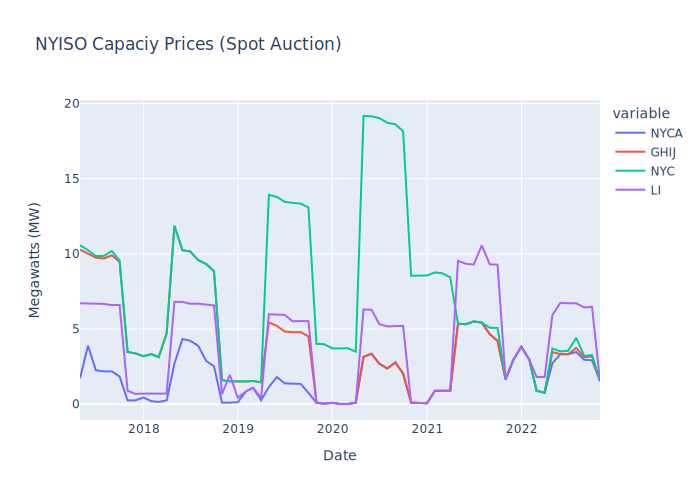

In [4]:
fig = px.line(spot_prices, title="NYISO Capaciy Prices (Spot Auction)")
fig.update_layout(xaxis_title="Date", yaxis_title="Megawatts (MW)")
fig.show("svg")